# Visualising the Data: Integrative Model to Measure and Improve Urban Agriculture: Food-Energy-Water Meter, 2019-2020

This is the link to GitHub: https://github.com/simon-510/everything_counts_assignments 

The FEW-Meter project aimed to investigate and compare the efficiency of different types (community gardens, allotments, micro-farms) of urban growing in the UK, France, Germany, Poland and the US. This was done through the collection of input and harvest data on a sample of sites in the case study countries as well as the measurement of fixed resources on-site (such as raised beds, greenhouses and office space) and the inclusion of tools used and consumables (such as petrol and heating fuel). 

The study also looked at the motivations of volunteers for working at these gardens/farms, their economic conditions, and the benefits they accrued from their involvement in the case studies.
In this notebook, we will observe some basic visualisations of the data on these volunteers' responses. The dataset contains around 50 variables, because it represents a survey asking lots of questions to individuals who took part in the study, such as 'number of years participated in the garden/farm', 'During growing season, percentage of vegetables and fruits that household eats which come from the garden/farm?', and 'Importance of contributing to my community'. The majority of the variables are catgorical, but those taking answers on scales of 'not important at all' to 'very important' can be roughly translated into numerical data as a 1-to-5 scale. 

Let's import the survey data from its upload location on this repository and observe the columns in the dataframe:

In [5]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns

# importing the data and printing the columns 
df_url = 'https://raw.githubusercontent.com/simon-510/everything_counts_assignments/main/FEW-meter%20data%20backup%2007%20Jan%202020.csv'
url_content = requests.get(df_url, verify=False).content
few_meter = pd.read_csv(io.StringIO(url_content.decode('latin1')))
few_meter.columns

Index(['Individual', 'Farmer ID', 'Farms', 'Age', 'Gender',
       'Current employment status',
       'If "other" employment status, please describe', 'Income currency',
       'Monthly Household Income (Gross)', 'Highest Level of Education',
       'Number of Years Living in Country',
       'Year started gardening (in general)',
       'Number of years participated in this garden/farm',
       'Year started participating in this farm/garden',
       'Since participating in garden/farm, amount of vegetables eaten per week',
       'Since participating in garden/farm, amount of fruits eaten per week',
       'Since participating in garden/farm, amount of meals prepared at home',
       'Have you tried any food from the garden/farm (vegetables, herbs, or fruits) that you had never eaten previously?',
       'Portions of vegetables or fruit eaten each day?',
       'During growing season, percentage of vegetables and fruits that household eats which come from the garden/farm?',
       '

As a first visualisation of this data, let's take a look at the age of respondents to the survey. The below figure is a Kernel Density Plot, showing the proportion of the farmers and gardeners of different ages. Not very surprisingly, there are two peaks around the ages early 20s and early 60s, associated with students/apprentices and the retired respectively, with quite a dip in between at the early 40s (roughly 50% of the density of the 'early 20s' peak). This demonstrates how having a mean of 44 and a median of 46 don't tell the story of the age distribution very fully. Looking at the standard deviation of 20.6 (high as a proportion of the mean, when compared to normal distributions), and correspondingly the upper and lower quartiles quite far from the mean, does however indicate that the spread is not normally distributed. 


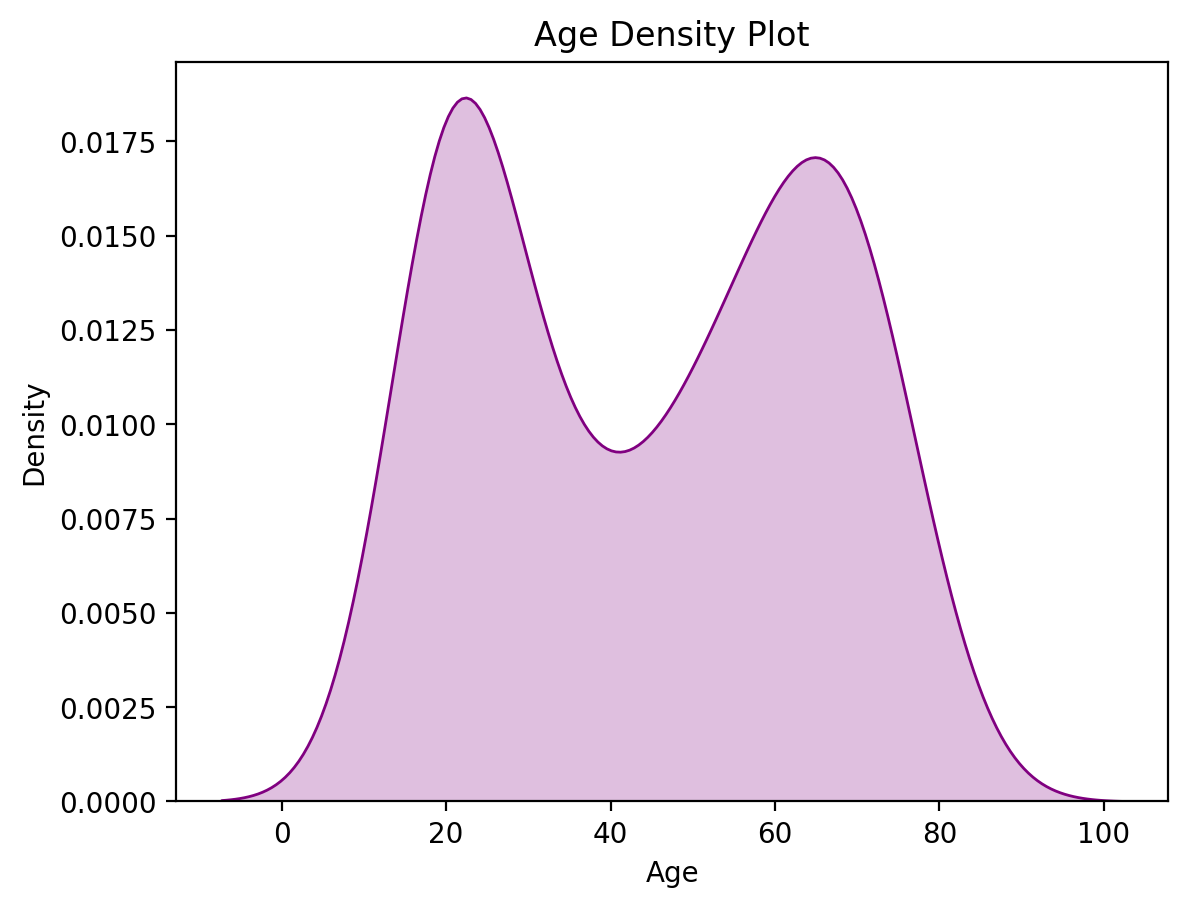

count    130.000000
mean      44.923077
std       20.607297
min       16.000000
25%       22.000000
50%       46.500000
75%       64.000000
max       79.000000
Name: Age, dtype: float64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

sns.kdeplot(few_meter['Age'], shade=True, color='purple')
plt.title('Age Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
few_meter['Age'].describe()

Now let's plot age compared with some other variables and see if the visualisations appear to demonstrate patterns (without doing any rigorous analysis of correlation or regression here). 
Below is a scatter plot of age with 'Hours spent in garden/farm per week'. Aside from the existence of one seemingly superhuman farmer in their 70s spending over 100 hours per week on their farm (I am dubious of that data), this doesn't show any obvious trend to the visual eye. 

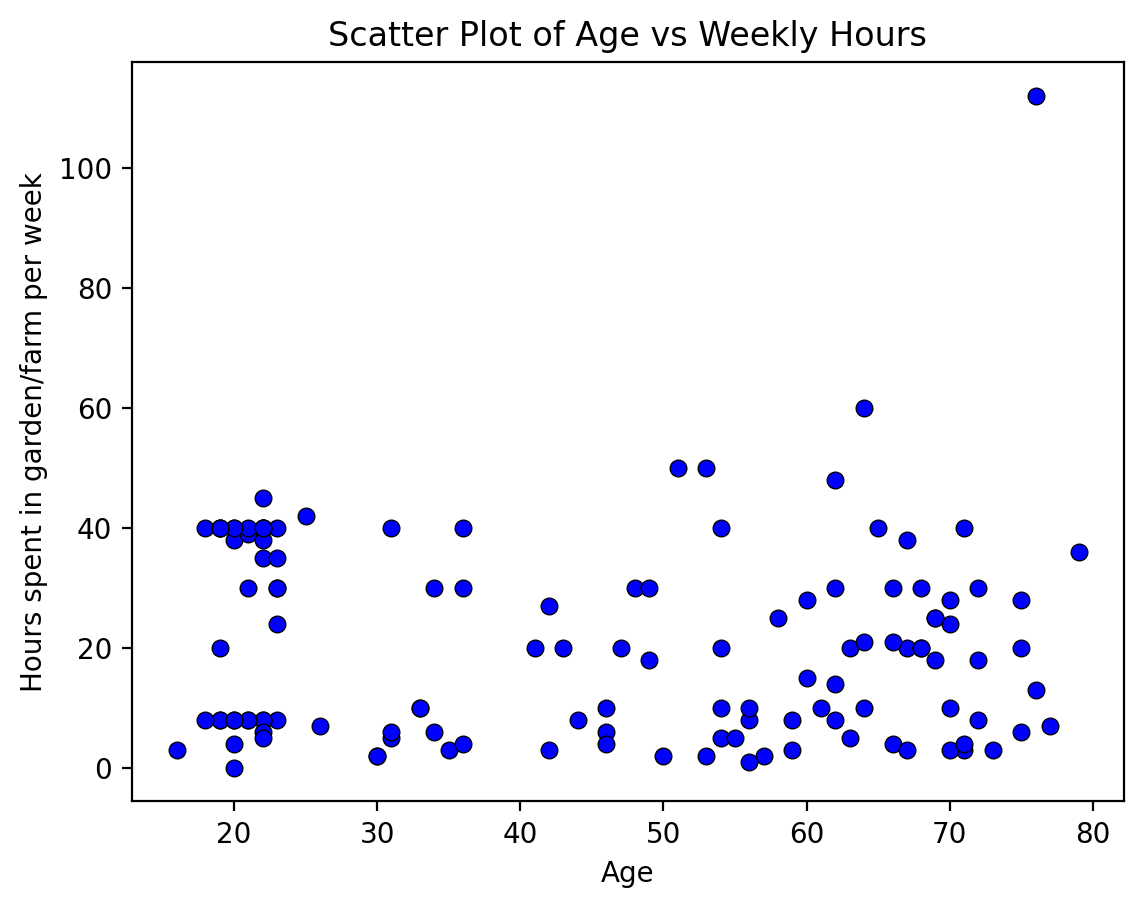

In [7]:
sns.scatterplot(x='Age', y='Hours spent in garden/farm per week', data=few_meter, color='blue', edgecolor='black')
plt.title('Scatter Plot of Age vs Weekly Hours')
plt.xlabel('Age')
plt.ylabel('Hours spent in garden/farm per week')
plt.show()

More obvious is the link here: age as compared to the number of years participated in the farm. This question in the survey was however posed as a categorical variable, with intervals of the number of years. For a scatter plot, this is far from an ideal way to have collected the data but we can still see some kind of a link through the below visualisation:

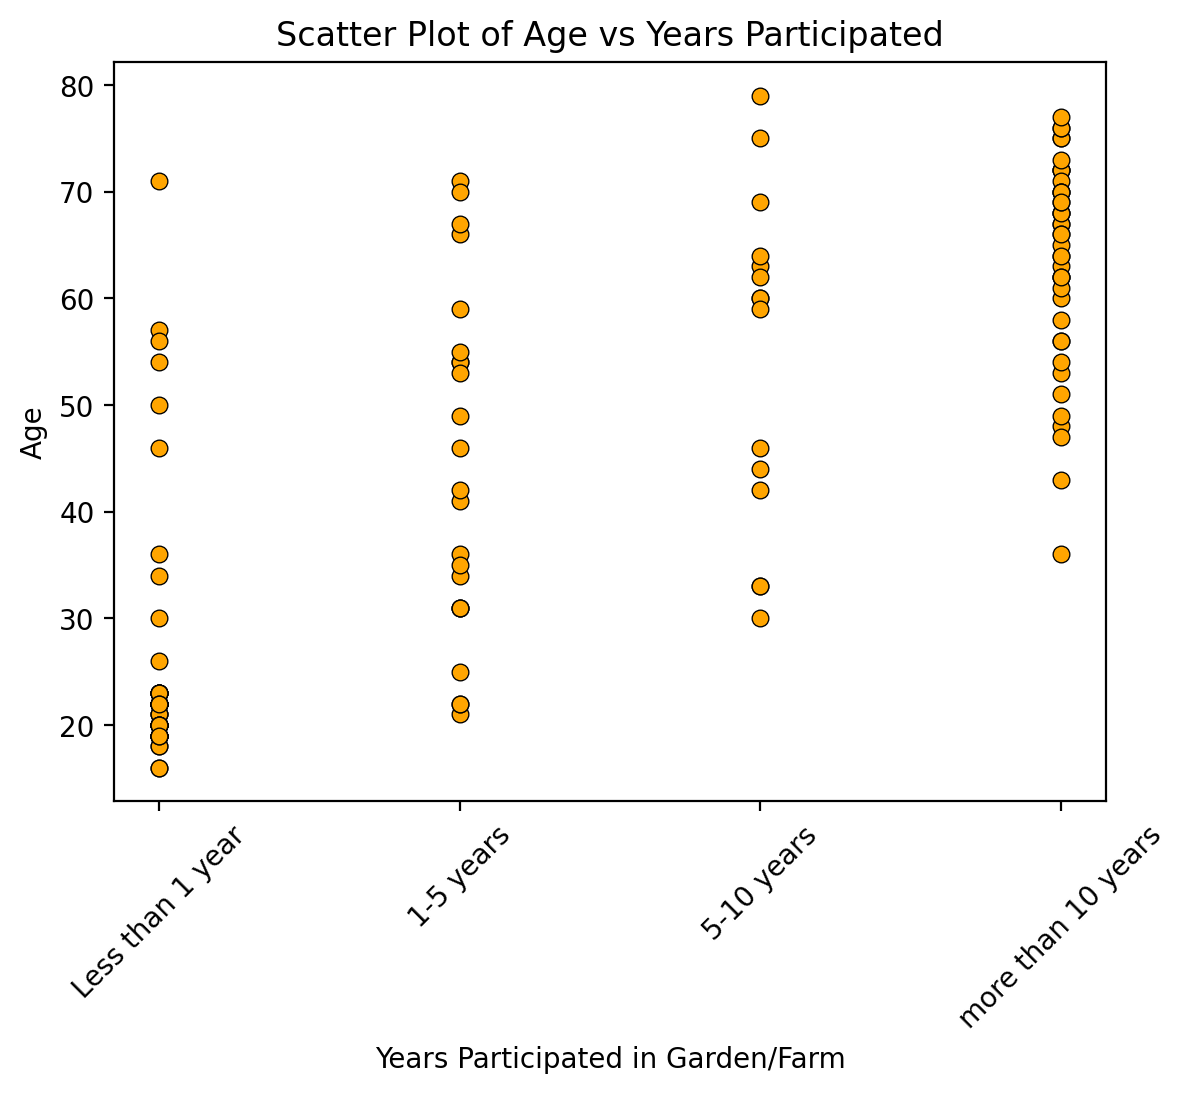

In [8]:
#I want to plot the years participated in the farm against age, but the labels came out very long and messy on the x-axis, so I'm renaming them with label mapping.
label_mapping = {
    'more than 5 years but less than 10 years': '5-10 years',
    'less than 1 year': '<1 year',
    'more than 1 year but less than 3 years': '1-3 years',
    'more than 3 years but less than 5 years': '3-5 years',
}
few_meter['Years Participated Short'] = few_meter['Number of years participated in this garden/farm'].replace(label_mapping)

sns.scatterplot(x='Years Participated Short', y='Age', data=few_meter, color='orange', edgecolor='black')
plt.title('Scatter Plot of Age vs Years Participated')
plt.xlabel('Years Participated in Garden/Farm')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

What if we try instead to plot these two variables with a boxplot? The links are clearer. If we were to do inferential analysis, we could 

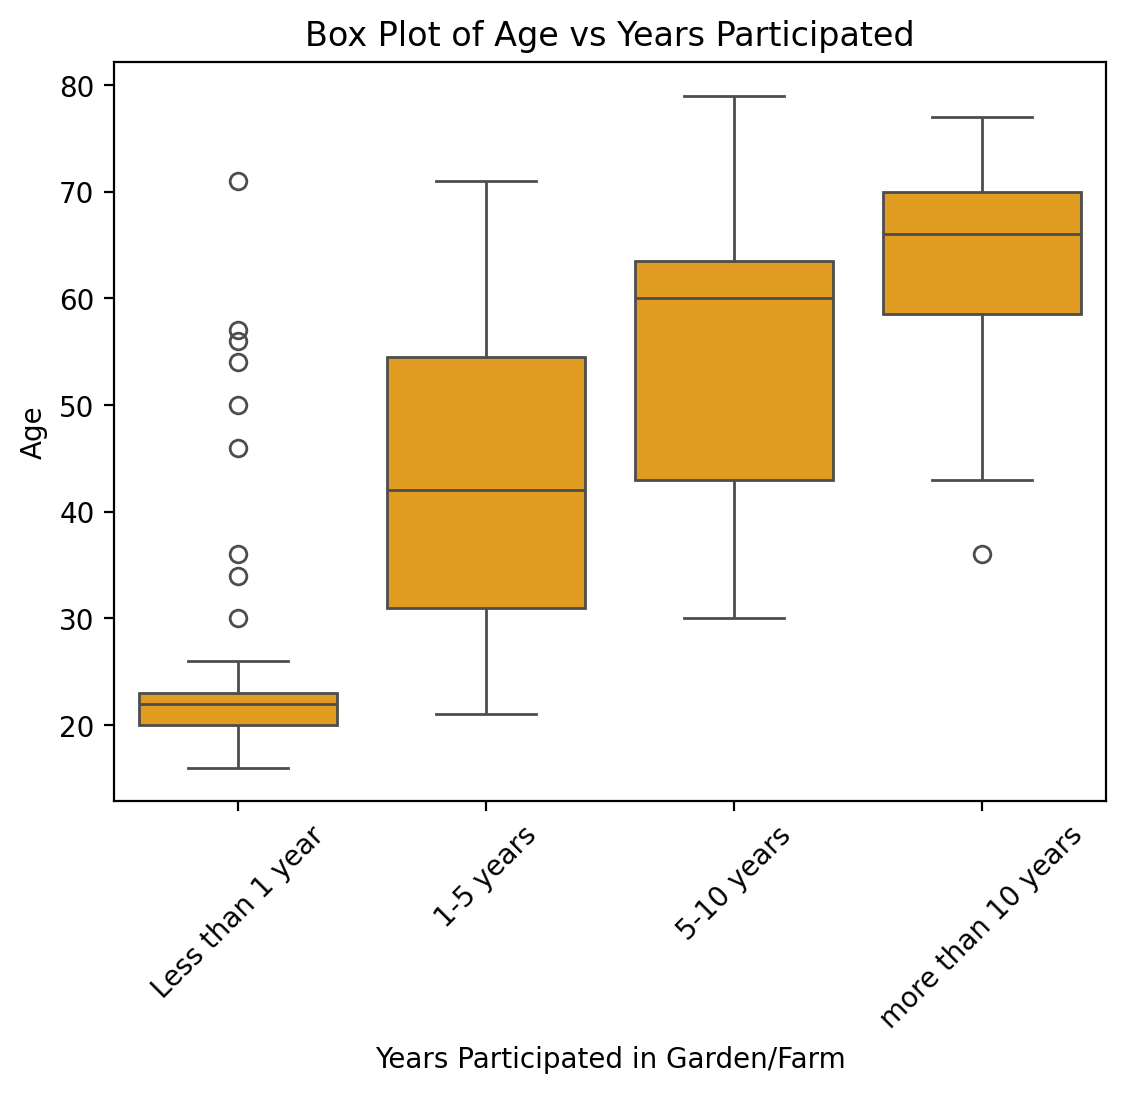

In [17]:
sns.boxplot(x='Years Participated Short', y='Age', data=few_meter, color='orange')
plt.title('Box Plot of Age vs Years Participated')
plt.xlabel('Years Participated in Garden/Farm')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


# sns.boxplot(x='City', y='Importance Community Numeric', data=few_meter_cleaned, palette='Set3') 
# plt.title('Importance of Contributing to Community by Different Cities')
# plt.xlabel('City')
# plt.ylabel('Importance (1 = Not Important, 5 = Very Important)')
# plt.xticks(rotation=45)  
# plt.show()

Now we will create a countplot to show the perceived employment prospects of respondents. When I first tried to generate this plot, the effets were in an illogical order, so I have cleaned the data by means of a relabelling list.

Unique options: ['Slight positive effect' 'No effect at all' 'Strong positive effect'
 'Strong negative effect' nan 'Slight negative effect']


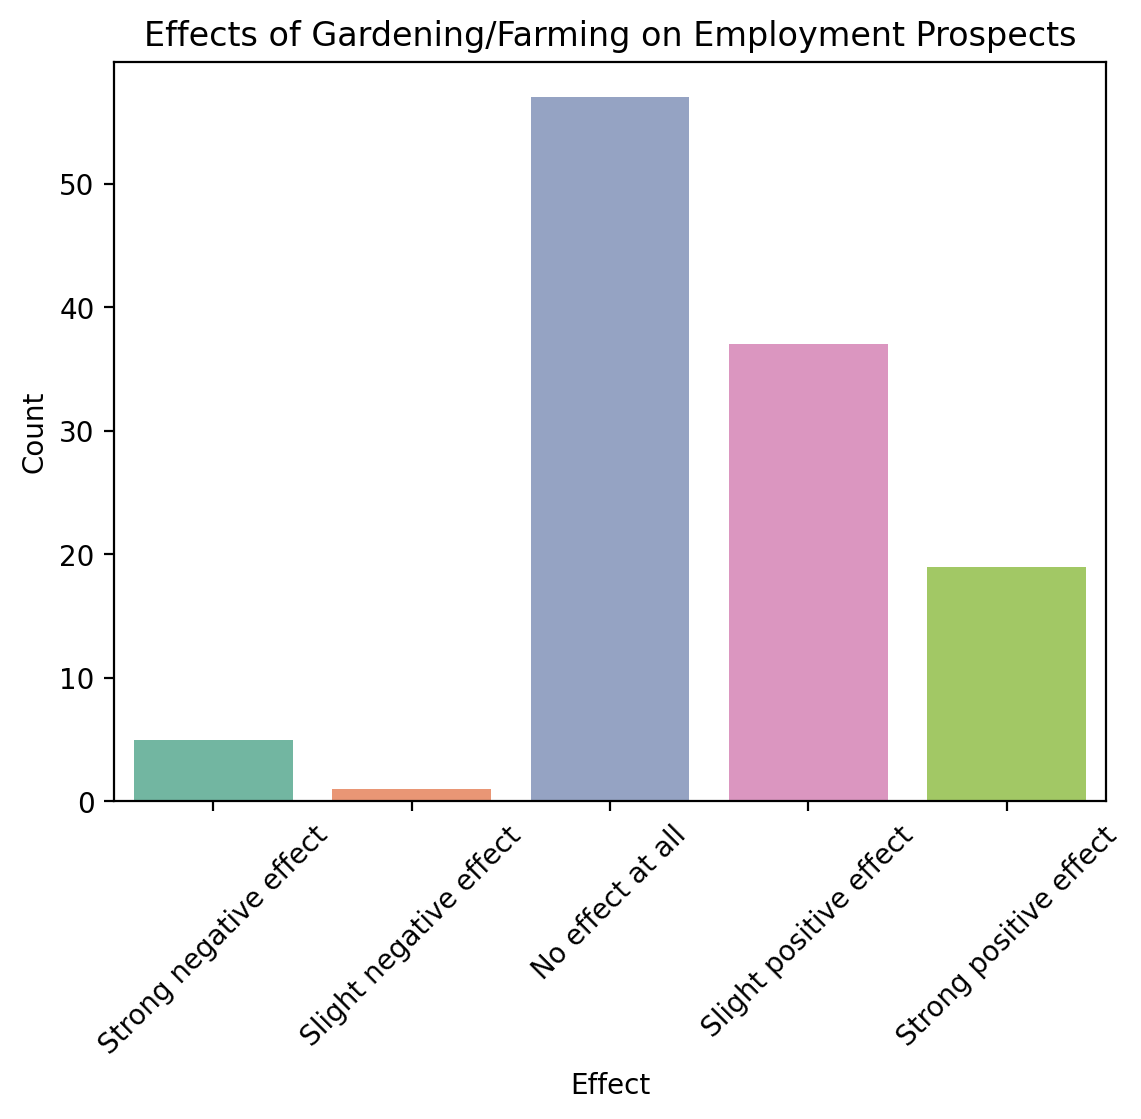

In [10]:
unique_values = few_meter['Effects of gardening/farming on my employment prospects'].unique()
print("Unique options:", unique_values)
label_order = ['Strong negative effect', 'Slight negative effect', 'No effect at all', 'Slight positive effect', 'Strong positive effect']

sns.countplot(x='Effects of gardening/farming on my employment prospects', data=few_meter, order=label_order, palette='Set2')
plt.title('Effects of Gardening/Farming on Employment Prospects')
plt.xlabel('Effect')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

The same thing was needed here in order to make a countplot of the Monthly Household Income for each farmer. 

Unique options: ["I don't want to answer" '1001 - 1500' '500 - 1000' 'Less than 500'
 '2001 - 3000' '3001 - 4000' '1501 - 2000' 'more than 4,000' nan]


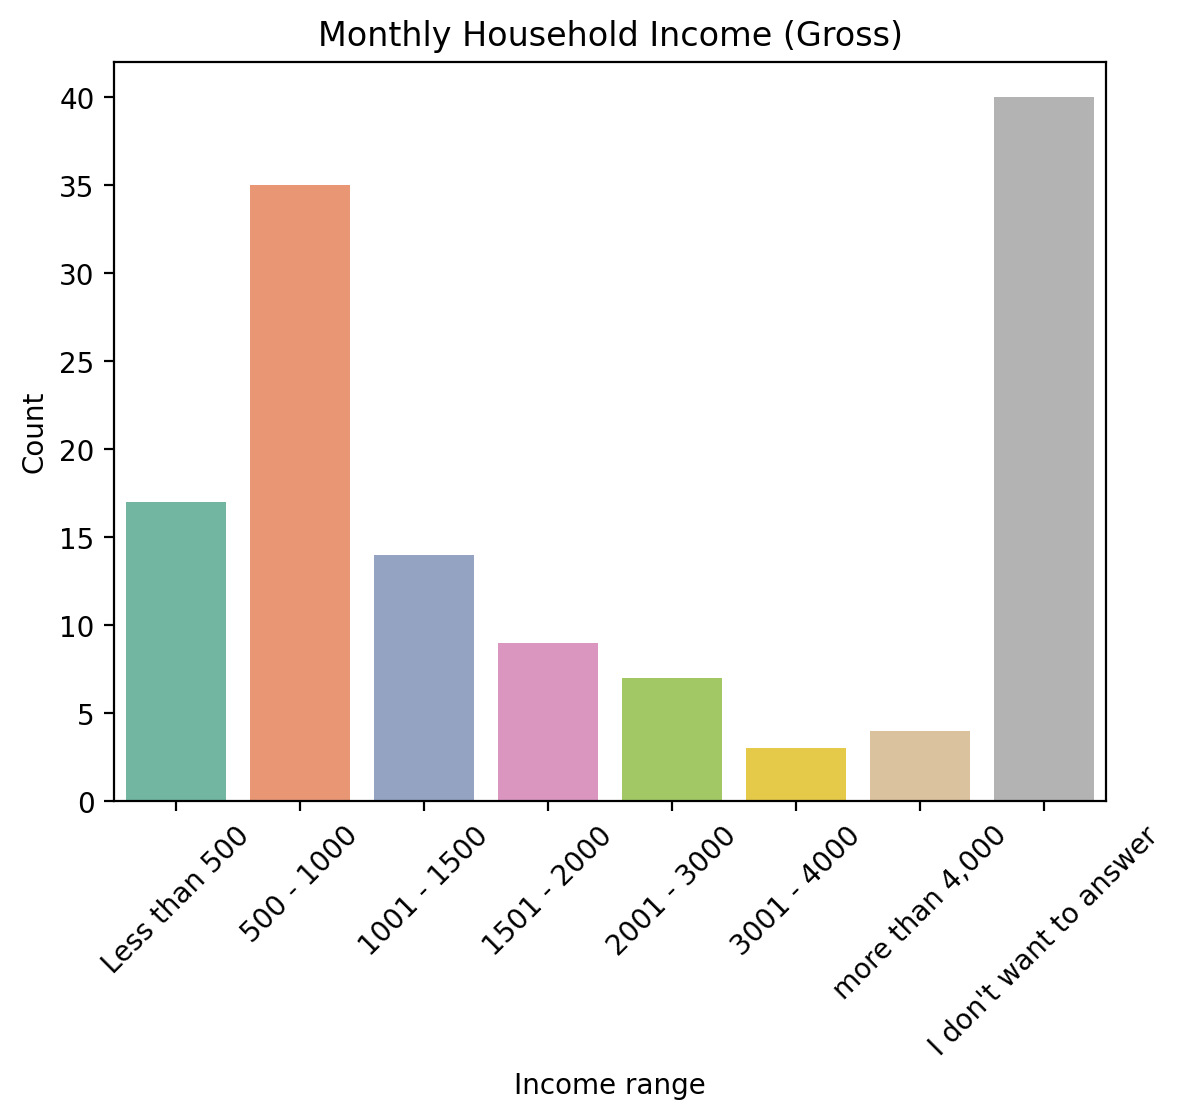

In [11]:
unique_values = few_meter['Monthly Household Income (Gross)'].unique()
print("Unique options:", unique_values)

label_order = ['Less than 500', '500 - 1000', '1001 - 1500', '1501 - 2000',
 '2001 - 3000', '3001 - 4000', 'more than 4,000', "I don't want to answer"]

sns.countplot(x='Monthly Household Income (Gross)', data=few_meter, order=label_order, palette='Set2')
plt.title('Monthly Household Income (Gross)')
plt.xlabel('Income range')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

Many of the survey questions have lists of answers like 'not important at all'...,'very important'. If we translate these answers from categorical variables to a score from 1 to 5 with 1 being not important at all, and 5 being very important, using a mapping, we can then create boxplots comparing these responses across the respondents from different cities to see if there are discernable patterns or variance between the cities. First we have to clean the data by removing the non-response entries (separately for each question in the survey that we want to plot for).

In [12]:
print(few_meter['Importance of contributing to my community'].unique())
importance_mapping = {
    'Not important at all': 1,
    'Not so important': 2,
    'Neutral': 3,
    'Fairly important': 4,
    'Very important': 5
}

['Neutral' 'Fairly important' 'Very important' 'Not so important'
 'Not important at all' nan 'No response']


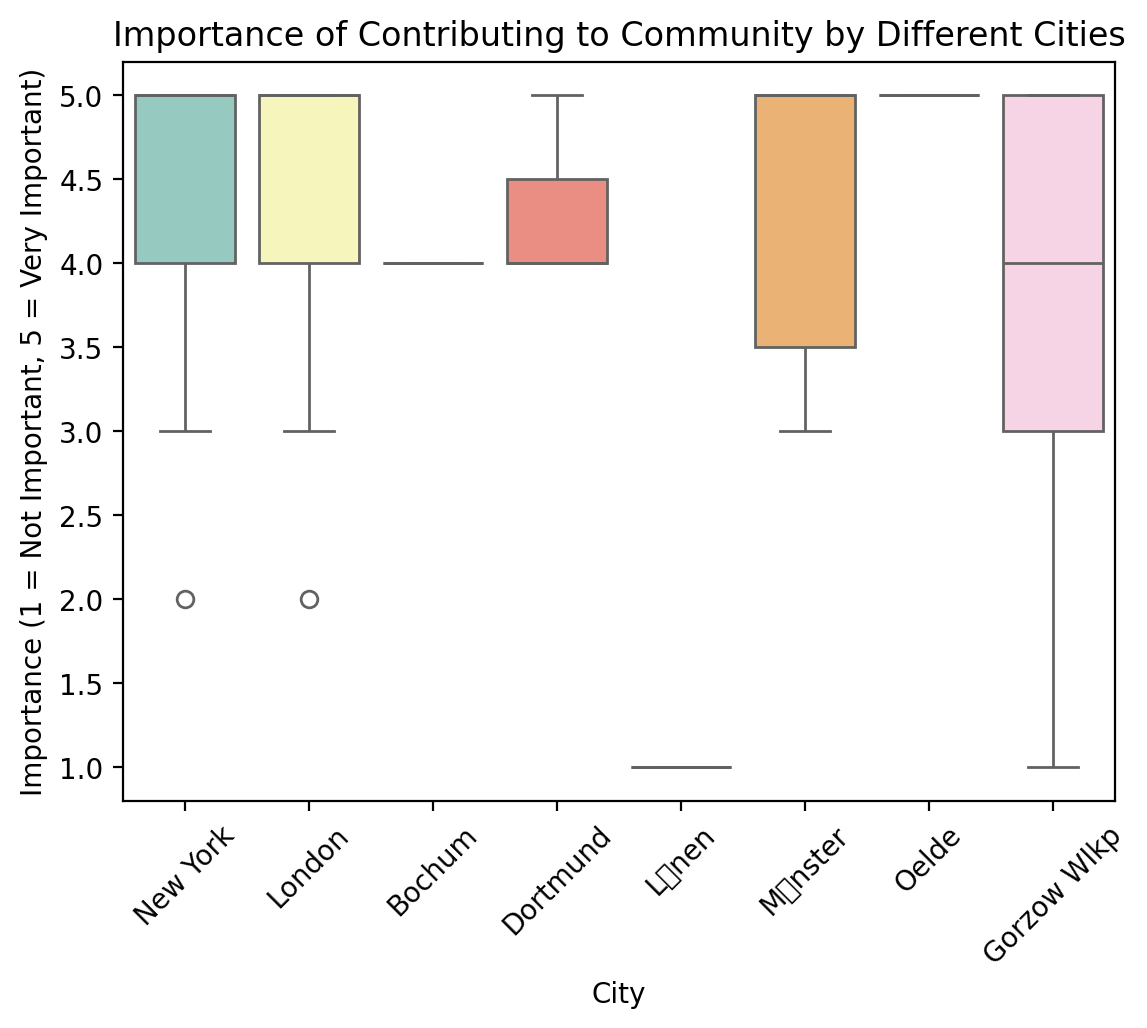

In [13]:
few_meter_cleaned = few_meter[
    few_meter['Importance of contributing to my community'].isin(importance_mapping.keys())
]
few_meter_cleaned['Importance Community Numeric'] = few_meter_cleaned['Importance of contributing to my community'].replace(importance_mapping)

sns.boxplot(x='City', y='Importance Community Numeric', data=few_meter_cleaned, palette='Set3') 
plt.title('Importance of Contributing to Community by Different Cities')
plt.xlabel('City')
plt.ylabel('Importance (1 = Not Important, 5 = Very Important)')
plt.xticks(rotation=45)  
plt.show()

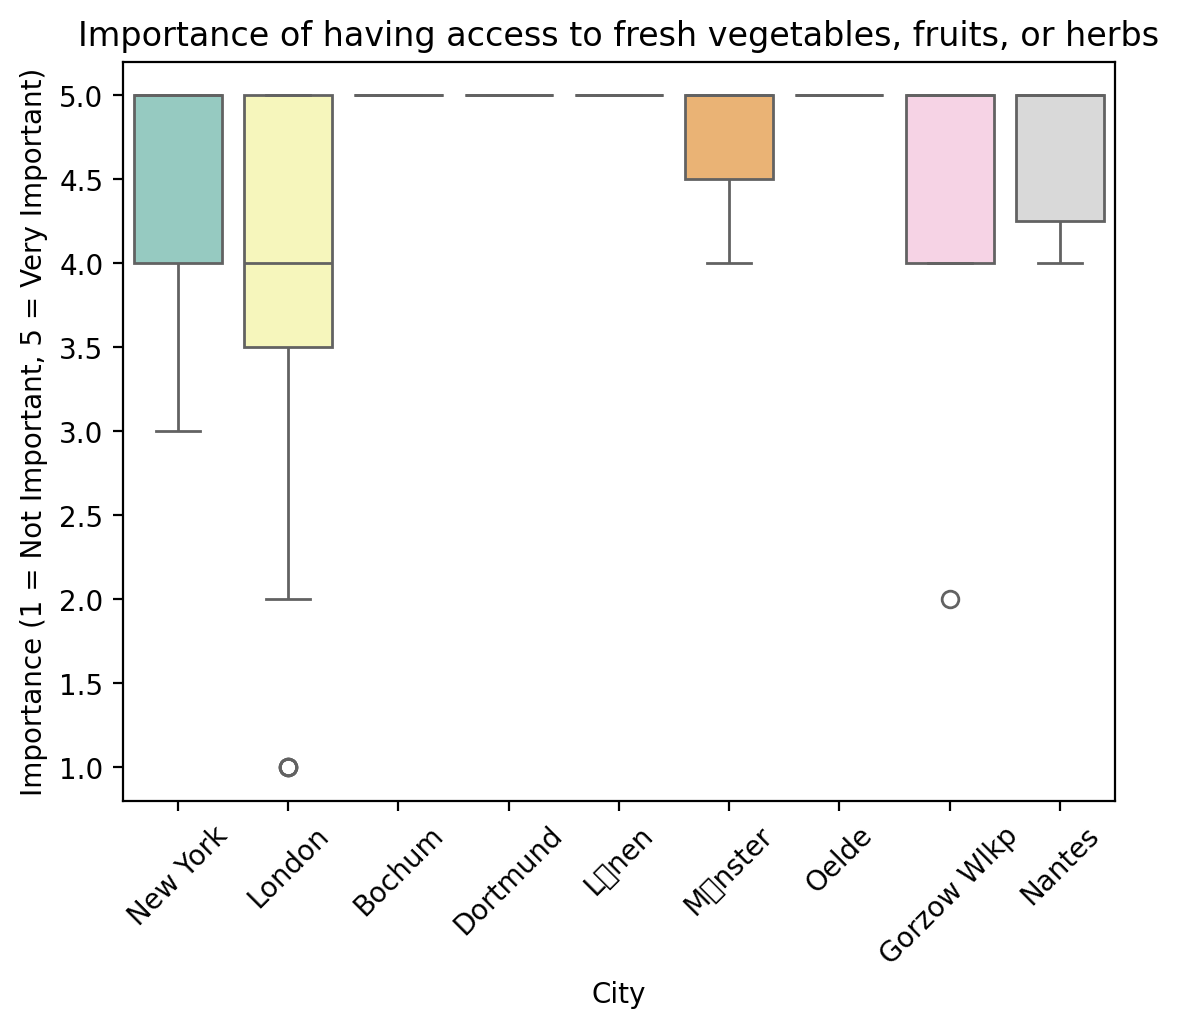

["Don't know" '75%' 'None (0%)' '25%' '50%' 'All (100%)' nan]


In [14]:
few_meter['Importance Fresh Numeric'] = few_meter['Importance of having access to fresh vegetables, fruits, or herbs'].replace(importance_mapping)

sns.boxplot(x='City', y='Importance Fresh Numeric', data=few_meter, palette='Set3') 
plt.title('Importance of having access to fresh vegetables, fruits, or herbs')
plt.xlabel('City')
plt.ylabel('Importance (1 = Not Important, 5 = Very Important)')
plt.xticks(rotation=45)  
plt.show()
print(few_meter['During growing season, percentage of vegetables and fruits that household eats which come from the garden/farm?'].unique())

Doing the same thing with a percentage mapping for the percentage of vegetables respondents eat that come from the garden/farm. Clearly there is not enough relevant data for this plot to be very useful, but I'll leave it here, also demonstrating the limitations of visualisation with this dataframe. 

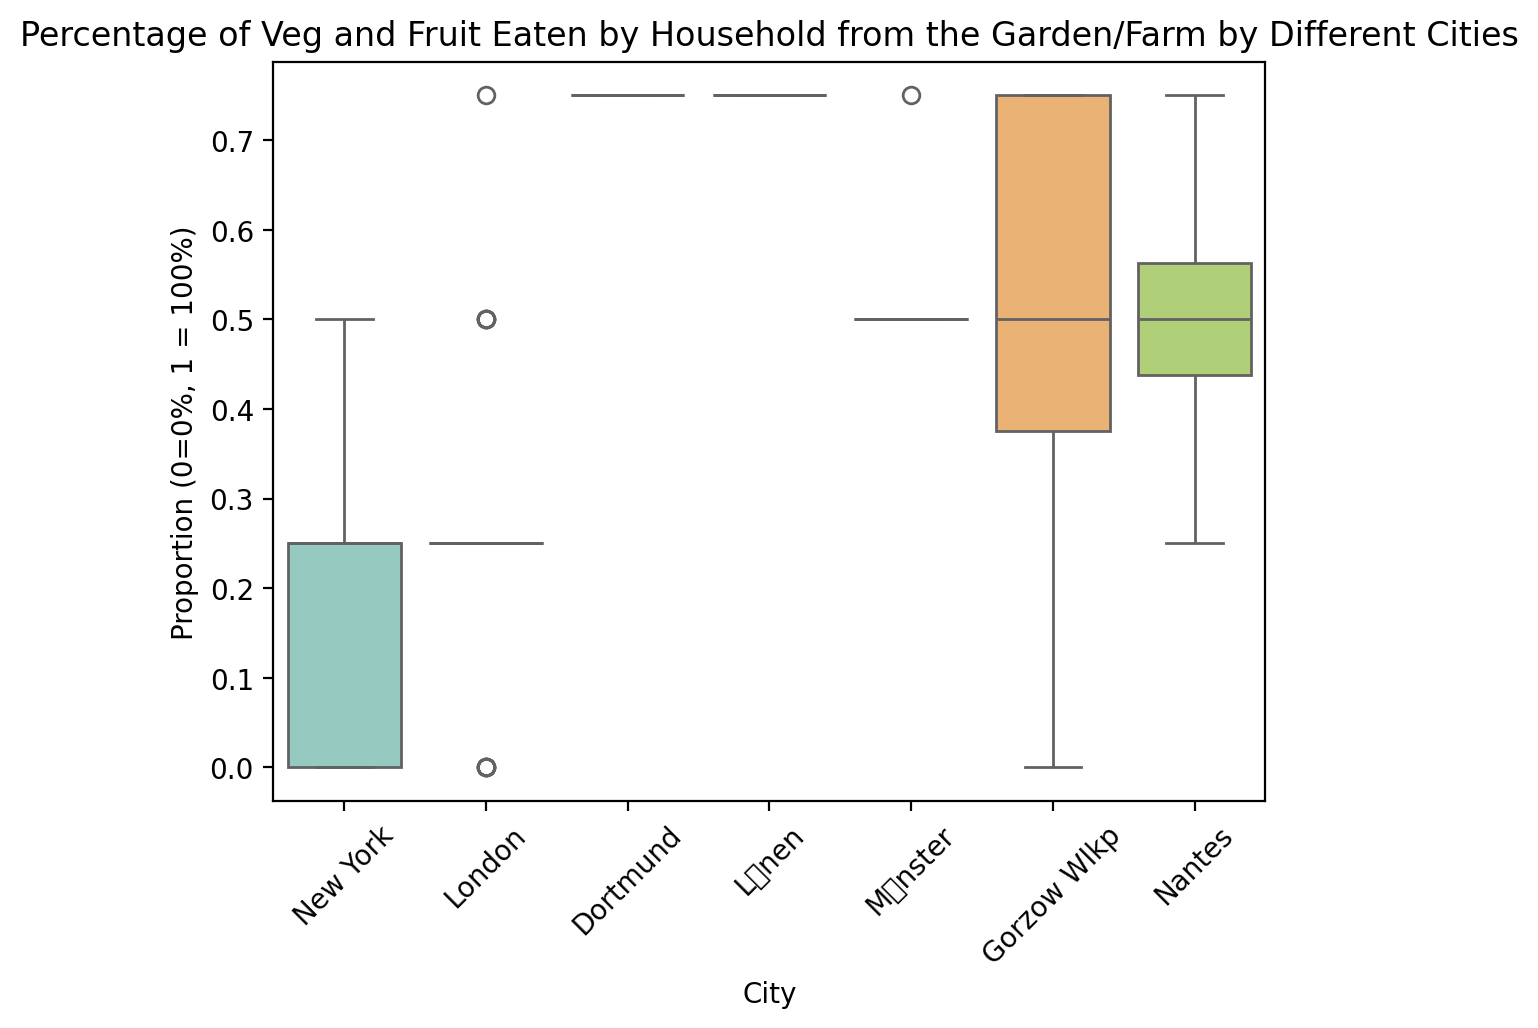

In [15]:
percentage_mapping = {
    'None (0%)': 0.0,
    '25%': 0.25,
    '50%': 0.5,
    '75%': 0.75,
    '100%': 1.0
}

few_meter_cleaned = few_meter[
    few_meter['During growing season, percentage of vegetables and fruits that household eats which come from the garden/farm?'].isin(percentage_mapping.keys())
]
few_meter_cleaned['Percentage Veg Numeric'] = few_meter_cleaned['During growing season, percentage of vegetables and fruits that household eats which come from the garden/farm?'].replace(percentage_mapping)

sns.boxplot(x='City', y='Percentage Veg Numeric', data=few_meter_cleaned, palette='Set3') 
plt.title('Percentage of Veg and Fruit Eaten by Household from the Garden/Farm by Different Cities')
plt.xlabel('City')
plt.ylabel('Proportion (0=0%, 1 = 100%)')
plt.xticks(rotation=45)  
plt.show()